<a href="https://colab.research.google.com/github/AaravWattal/RRAM-Models/blob/main/updatedPostreadConductanceVisualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Import and Set Up Data

In [2]:
# import matplotlib, numpy, and pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.ensemble

In [3]:
# get file set_sweep for conductange range data
names = ["addr", "pw", "vwl", "vbsl", "preread", "postread"]
data = pd.read_csv("/content/set_sweep.csv", names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,151240.470700,115068.986900
1,2,2.000000e-08,0.5,1.0,123855.302200,124977.565700
2,4,2.000000e-08,0.5,1.5,127236.989700,106676.196700
3,6,2.000000e-08,0.5,2.0,93031.982770,133852.645200
4,8,2.000000e-08,0.5,2.5,75606.517090,57549.247700
5,10,2.000000e-08,0.5,3.0,97572.302250,92171.401490
6,12,2.000000e-08,0.6,0.5,46314.963040,50373.876070
7,14,2.000000e-08,0.6,1.0,100303.315400,149505.440600
8,16,2.000000e-08,0.6,1.5,212694.720700,75614.854910
9,18,2.000000e-08,0.6,2.0,5747.716015,5608.268993


In [4]:
np.min(data["pw"])

2e-08

In [5]:
data['preread'] = 1/data['preread']
data['postread'] = 1/data['postread']
data

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,0.000007,0.000009
1,2,2.000000e-08,0.5,1.0,0.000008,0.000008
2,4,2.000000e-08,0.5,1.5,0.000008,0.000009
3,6,2.000000e-08,0.5,2.0,0.000011,0.000007
4,8,2.000000e-08,0.5,2.5,0.000013,0.000017
...,...,...,...,...,...,...
32763,65526,2.000000e-08,0.5,2.0,0.000009,0.000011
32764,65528,2.000000e-08,0.5,2.5,0.000009,0.000009
32765,65530,2.000000e-08,0.5,3.0,0.000011,0.000014
32766,65532,2.000000e-08,0.6,0.5,0.000015,0.000013


#Preread vs Postread Conductance Visualizations

##Varying Pulse Width

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
906     1812  0.000001  0.6   0.5  0.000008  0.000011
912     1824  0.000001  0.7   0.5  0.000010  0.000008
918     1836  0.000001  0.8   0.5  0.000007  0.000011
924     1848  0.000001  0.9   0.5  0.000010  0.000009
...      ...       ...  ...   ...       ...       ...
32550  65100  0.000001  3.0   0.5  0.000003  0.000005
32556  65112  0.000001  3.1   0.5  0.000017  0.000017
32562  65124  0.000001  3.2   0.5  0.000009  0.000014
32568  65136  0.000001  3.3   0.5  0.000014  0.000010
32574  65148  0.000001  3.4   0.5  0.000028  0.000034

[780 rows x 6 columns]


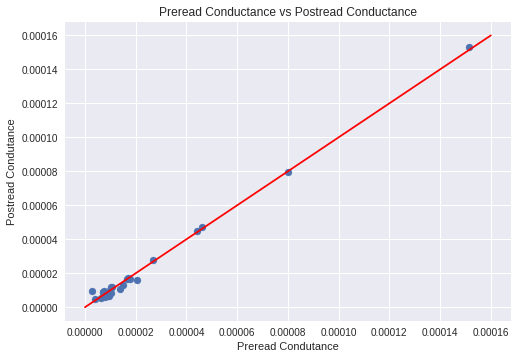

In [19]:
# pw = 1e-6, vwl = 0.5, vbsl = 0.5
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==0.5]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"])
plt.plot([0, 0.00016], [0, 0.00016], "r");

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
906     1812  0.000001  0.6   0.5  0.000008  0.000011
912     1824  0.000001  0.7   0.5  0.000010  0.000008
918     1836  0.000001  0.8   0.5  0.000007  0.000011
924     1848  0.000001  0.9   0.5  0.000010  0.000009
...      ...       ...  ...   ...       ...       ...
32550  65100  0.000001  3.0   0.5  0.000003  0.000005
32556  65112  0.000001  3.1   0.5  0.000017  0.000017
32562  65124  0.000001  3.2   0.5  0.000009  0.000014
32568  65136  0.000001  3.3   0.5  0.000014  0.000010
32574  65148  0.000001  3.4   0.5  0.000028  0.000034

[780 rows x 6 columns]


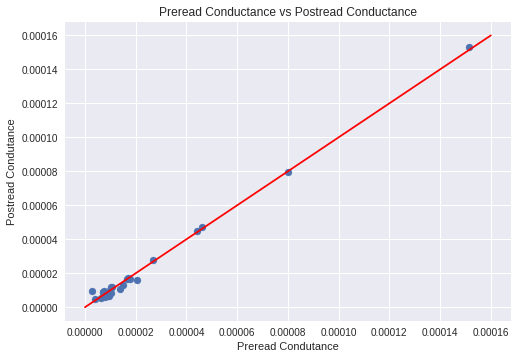

In [20]:
# pw = 2e-8, vwl = 0.5, vbsl = 0.5
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==0.5]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"])
plt.plot([0, 0.00016], [0, 0.00016], "r");

##Varying Wordline Voltage

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
906     1812  0.000001  0.6   0.5  0.000008  0.000011
912     1824  0.000001  0.7   0.5  0.000010  0.000008
918     1836  0.000001  0.8   0.5  0.000007  0.000011
924     1848  0.000001  0.9   0.5  0.000010  0.000009
...      ...       ...  ...   ...       ...       ...
32550  65100  0.000001  3.0   0.5  0.000003  0.000005
32556  65112  0.000001  3.1   0.5  0.000017  0.000017
32562  65124  0.000001  3.2   0.5  0.000009  0.000014
32568  65136  0.000001  3.3   0.5  0.000014  0.000010
32574  65148  0.000001  3.4   0.5  0.000028  0.000034

[780 rows x 6 columns]


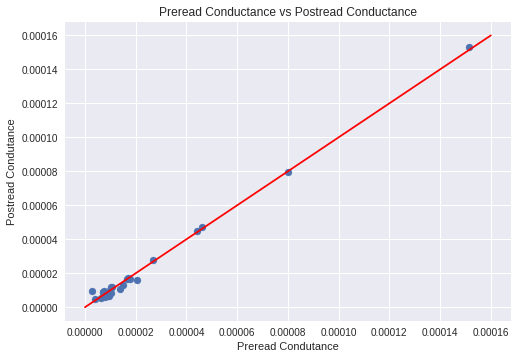

In [22]:
# pw = 1e-6, vwl = 0.5, vbsl = 0.5
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==0.5]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"])
plt.plot([0, 0.00016], [0, 0.00016], "r");

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
906     1812  0.000001  0.6   0.5  0.000008  0.000011
912     1824  0.000001  0.7   0.5  0.000010  0.000008
918     1836  0.000001  0.8   0.5  0.000007  0.000011
924     1848  0.000001  0.9   0.5  0.000010  0.000009
...      ...       ...  ...   ...       ...       ...
32550  65100  0.000001  3.0   0.5  0.000003  0.000005
32556  65112  0.000001  3.1   0.5  0.000017  0.000017
32562  65124  0.000001  3.2   0.5  0.000009  0.000014
32568  65136  0.000001  3.3   0.5  0.000014  0.000010
32574  65148  0.000001  3.4   0.5  0.000028  0.000034

[780 rows x 6 columns]


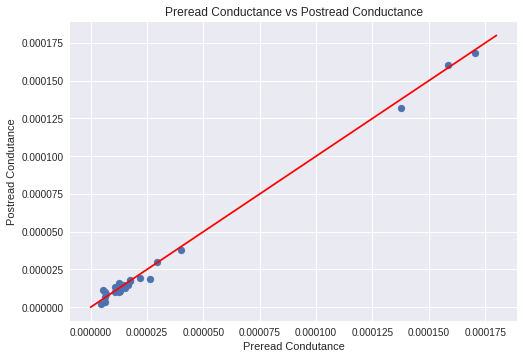

In [24]:
# pw = 1e-6, vwl = 2.0, vbsl = 0.5
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==2.0]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"])
plt.plot([0, 0.00018], [0, 0.00018], "r");

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
906     1812  0.000001  0.6   0.5  0.000008  0.000011
912     1824  0.000001  0.7   0.5  0.000010  0.000008
918     1836  0.000001  0.8   0.5  0.000007  0.000011
924     1848  0.000001  0.9   0.5  0.000010  0.000009
...      ...       ...  ...   ...       ...       ...
32550  65100  0.000001  3.0   0.5  0.000003  0.000005
32556  65112  0.000001  3.1   0.5  0.000017  0.000017
32562  65124  0.000001  3.2   0.5  0.000009  0.000014
32568  65136  0.000001  3.3   0.5  0.000014  0.000010
32574  65148  0.000001  3.4   0.5  0.000028  0.000034

[780 rows x 6 columns]


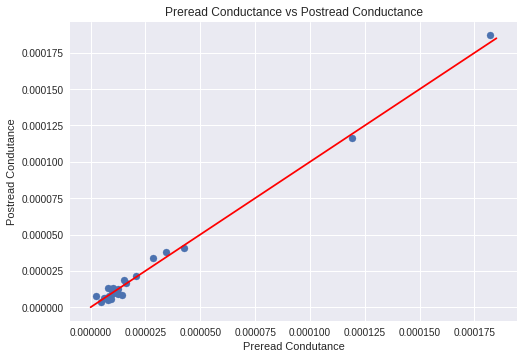

In [26]:
# pw = 1e-6, vwl = 3.4, vbsl = 0.5
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==3.4]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"])
plt.plot([0, 0.000185], [0, 0.000185], "r");

##Varying Bitline Voltage

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
906     1812  0.000001  0.6   0.5  0.000008  0.000011
912     1824  0.000001  0.7   0.5  0.000010  0.000008
918     1836  0.000001  0.8   0.5  0.000007  0.000011
924     1848  0.000001  0.9   0.5  0.000010  0.000009
...      ...       ...  ...   ...       ...       ...
32550  65100  0.000001  3.0   0.5  0.000003  0.000005
32556  65112  0.000001  3.1   0.5  0.000017  0.000017
32562  65124  0.000001  3.2   0.5  0.000009  0.000014
32568  65136  0.000001  3.3   0.5  0.000014  0.000010
32574  65148  0.000001  3.4   0.5  0.000028  0.000034

[780 rows x 6 columns]


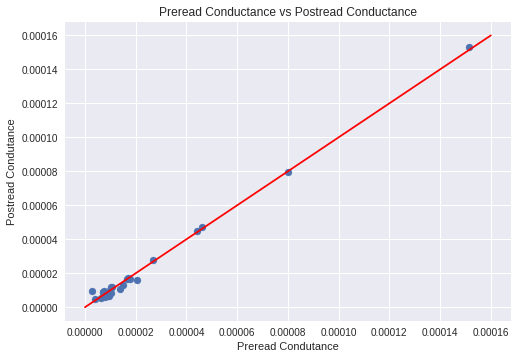

In [28]:
# pw = 1e-6, vwl = 0.5, vbsl = 0.5
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==0.5]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"])
plt.plot([0, 0.00016], [0, 0.00016], "r");

        addr        pw  vwl  vbsl   preread  postread
903     1806  0.000001  0.5   2.0  0.000005  0.000013
909     1818  0.000001  0.6   2.0  0.000009  0.000010
915     1830  0.000001  0.7   2.0  0.000009  0.000010
921     1842  0.000001  0.8   2.0  0.000010  0.000040
927     1854  0.000001  0.9   2.0  0.000010  0.000075
...      ...       ...  ...   ...       ...       ...
32553  65106  0.000001  3.0   2.0  0.000009  0.000158
32559  65118  0.000001  3.1   2.0  0.000009  0.000164
32565  65130  0.000001  3.2   2.0  0.000017  0.000166
32571  65142  0.000001  3.3   2.0  0.000017  0.000164
32577  65154  0.000001  3.4   2.0  0.000013  0.000149

[780 rows x 6 columns]


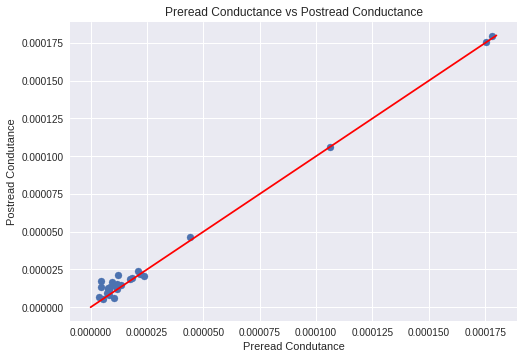

In [29]:
# pw = 1e-6, vwl = 0.5, vbsl = 2.0
subset = data[np.bitwise_and(data["vbsl"]==2.0,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==0.5]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"])
plt.plot([0, 0.00018], [0, 0.00018], "r");

        addr        pw  vwl  vbsl   preread  postread
905     1810  0.000001  0.5   3.0  0.000015  0.000016
911     1822  0.000001  0.6   3.0  0.000010  0.000026
917     1834  0.000001  0.7   3.0  0.000004  0.000079
923     1846  0.000001  0.8   3.0  0.000012  0.000084
929     1858  0.000001  0.9   3.0  0.000008  0.000079
...      ...       ...  ...   ...       ...       ...
32555  65110  0.000001  3.0   3.0  0.000027  0.000170
32561  65122  0.000001  3.1   3.0  0.000024  0.000170
32567  65134  0.000001  3.2   3.0  0.000012  0.000178
32573  65146  0.000001  3.3   3.0  0.000010  0.000172
32579  65158  0.000001  3.4   3.0  0.000010  0.000178

[780 rows x 6 columns]


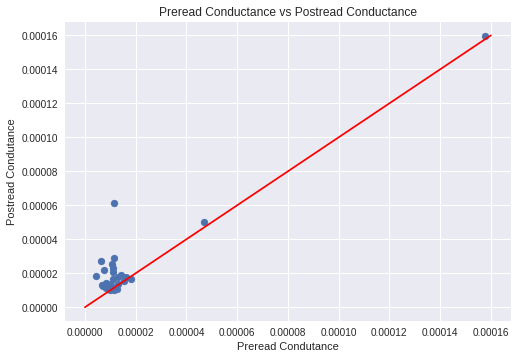

In [30]:
# pw = 1e-6, vwl = 0.5, vbsl = 3.0
subset = data[np.bitwise_and(data["vbsl"]==3.0,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==0.5]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"])
plt.plot([0, 0.00016], [0, 0.00016], "r");

##Varying Bitline Voltage

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
906     1812  0.000001  0.6   0.5  0.000008  0.000011
912     1824  0.000001  0.7   0.5  0.000010  0.000008
918     1836  0.000001  0.8   0.5  0.000007  0.000011
924     1848  0.000001  0.9   0.5  0.000010  0.000009
...      ...       ...  ...   ...       ...       ...
32550  65100  0.000001  3.0   0.5  0.000003  0.000005
32556  65112  0.000001  3.1   0.5  0.000017  0.000017
32562  65124  0.000001  3.2   0.5  0.000009  0.000014
32568  65136  0.000001  3.3   0.5  0.000014  0.000010
32574  65148  0.000001  3.4   0.5  0.000028  0.000034

[780 rows x 6 columns]


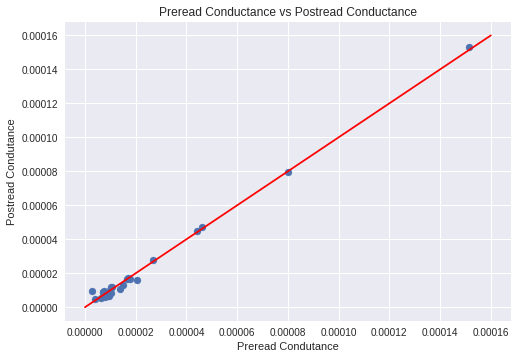

In [31]:
# pw = 1e-6, vwl = 0.5, vbsl = 0.5
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["pw"]==1e-6)]
subset2 = subset[subset["vwl"]==0.5]

plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset2["preread"],subset2["postread"]);
plt.plot([0, 0.00016], [0, 0.00016], "r");

##Mixing and Matching

###Only contrain pw and vbsl

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
906     1812  0.000001  0.6   0.5  0.000008  0.000011
912     1824  0.000001  0.7   0.5  0.000010  0.000008
918     1836  0.000001  0.8   0.5  0.000007  0.000011
924     1848  0.000001  0.9   0.5  0.000010  0.000009
...      ...       ...  ...   ...       ...       ...
32550  65100  0.000001  3.0   0.5  0.000003  0.000005
32556  65112  0.000001  3.1   0.5  0.000017  0.000017
32562  65124  0.000001  3.2   0.5  0.000009  0.000014
32568  65136  0.000001  3.3   0.5  0.000014  0.000010
32574  65148  0.000001  3.4   0.5  0.000028  0.000034

[780 rows x 6 columns]


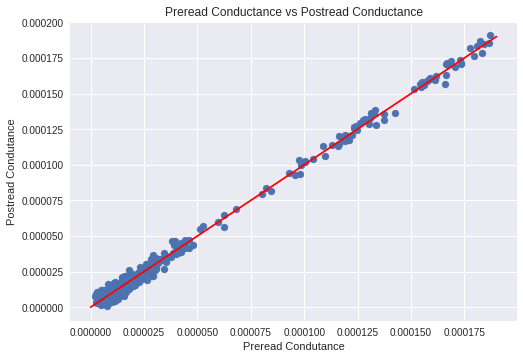

In [40]:
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["pw"]==1e-6)]
plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset["preread"],subset["postread"]);
plt.plot([0, 0.00019], [0, 0.00019], "r");

###Only contrain pw and vwl

        addr        pw  vwl  vbsl   preread  postread
900     1800  0.000001  0.5   0.5  0.000008  0.000006
901     1802  0.000001  0.5   1.0  0.000014  0.000013
902     1804  0.000001  0.5   1.5  0.000013  0.000012
903     1806  0.000001  0.5   2.0  0.000005  0.000013
904     1808  0.000001  0.5   2.5  0.000009  0.000013
...      ...       ...  ...   ...       ...       ...
32401  64802  0.000001  0.5   1.0  0.000013  0.000011
32402  64804  0.000001  0.5   1.5  0.000019  0.000015
32403  64806  0.000001  0.5   2.0  0.000014  0.000014
32404  64808  0.000001  0.5   2.5  0.000010  0.000013
32405  64810  0.000001  0.5   3.0  0.000011  0.000025

[156 rows x 6 columns]


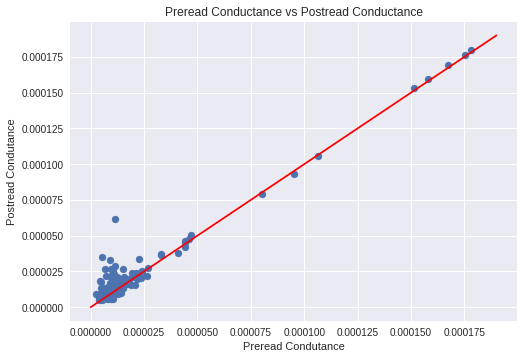

In [42]:
subset = data[np.bitwise_and(data["vwl"]==0.5,data["pw"]==1e-6)]
plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset["preread"],subset["postread"]);
plt.plot([0, 0.00019], [0, 0.00019], "r");

###Only contrain vwl and vbsl

        addr            pw  vwl  vbsl   preread  postread
0          0  2.000000e-08  0.5   0.5  0.000007  0.000009
180      360  4.000000e-08  0.5   0.5  0.000008  0.000007
360      720  1.000000e-07  0.5   0.5  0.000012  0.000013
540     1080  2.000000e-07  0.5   0.5  0.000010  0.000010
720     1440  4.000000e-07  0.5   0.5  0.000008  0.000010
...      ...           ...  ...   ...       ...       ...
32040  64080  2.000000e-07  0.5   0.5  0.000008  0.000009
32220  64440  4.000000e-07  0.5   0.5  0.000014  0.000015
32400  64800  1.000000e-06  0.5   0.5  0.000021  0.000016
32580  65160  2.000000e-06  0.5   0.5  0.000015  0.000011
32760  65520  2.000000e-08  0.5   0.5  0.000021  0.000018

[183 rows x 6 columns]


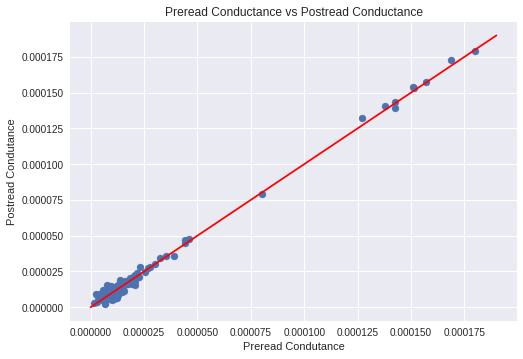

In [45]:
subset = data[np.bitwise_and(data["vbsl"]==0.5,data["vwl"]==0.5)]
plt.style.use('seaborn')
plt.title("Preread Conductance vs Postread Conductance")
plt.xlabel("Preread Condutance")
plt.ylabel("Postread Condutance");
print(subset)
plt.scatter(subset["preread"],subset["postread"]);
plt.plot([0, 0.00019], [0, 0.00019], "r");